In [7]:
import sys
sys.path.append("/home/graeme/")
sys.path.append('/home/graeme/ElexonDataManager/ElexonDataManager')

In [19]:
import psycopg2
import pandas as pd
import datetime as dt
import gzip
import numpy as np
import pytz
import math
#from ElexonDataManager.BMRA.management.commands import _upload_functions as uf
#from ElexonDataManager.BMRA.management.commands import _download_functions as df
from settings import DATABASES
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
py.init_notebook_mode(connected=True)

In [42]:
ts_start = dt.datetime(2016, 5, 9)
ts_start = dt.datetime(2016, 5, 10)

In [43]:
conn = psycopg2.connect("dbname='ElexonData' user={} host={} password={}".format(DATABASES['default']['USER'],
                                                                                DATABASES['default']['HOST'],
                                                                                DATABASES['default']['PASSWORD']))
cur = conn.cursor()

In [65]:
fuelhh_query = 'SELECT sp, ft_id as fueltype, fg \
FROM public.bmra_fuelhh \
where sd=\'{}-{:02d}-{:02d}\' \
order by sd, sp, ft_id;'.format(ts_start.year,
                              ts_start.month,
                              ts_start.day)

sql_df = pd.read_sql(fuelhh_query, conn)
sql_df['time'] = [ts_start+dt.timedelta(minutes=x*30) for x in sql_df['sp']]
sql_df

,sp,fueltype,fg,time
0,1,CCGT,12237.0,2016-05-10 00:30:00
1,1,COAL,0.0,2016-05-10 00:30:00
2,1,INTEW,284.0,2016-05-10 00:30:00
3,1,INTFR,1494.0,2016-05-10 00:30:00
4,1,INTIRL,198.0,2016-05-10 00:30:00
5,1,INTNED,0.0,2016-05-10 00:30:00
6,1,NPSHYD,171.0,2016-05-10 00:30:00
7,1,NUCLEAR,6762.0,2016-05-10 00:30:00
8,1,OCGT,0.0,2016-05-10 00:30:00
9,1,OIL,0.0,2016-05-10 00:30:00


In [67]:
sql_pivot = sql_df.pivot(index='time', columns='fueltype', values='fg')
sql_pivot

fueltype,CCGT,COAL,INTEW,INTFR,INTIRL,INTNED,NPSHYD,NUCLEAR,OCGT,OIL,OTHER,PS,WIND
time,,,,,,,,,,,,,
2016-05-10 00:30:00,12237.0,0.0,284.0,1494.0,198.0,0.0,171.0,6762.0,0.0,0.0,2051.0,-1452.0,1686.0
2016-05-10 01:00:00,11944.0,0.0,284.0,1494.0,198.0,0.0,171.0,6756.0,0.0,0.0,2049.0,-1524.0,1482.0
2016-05-10 01:30:00,11882.0,0.0,284.0,1494.0,198.0,0.0,153.0,6759.0,0.0,0.0,2045.0,-1692.0,1582.0
2016-05-10 02:00:00,11841.0,0.0,284.0,1494.0,198.0,0.0,152.0,6757.0,0.0,0.0,2052.0,-1686.0,1715.0
2016-05-10 02:30:00,11401.0,0.0,284.0,1494.0,198.0,0.0,151.0,6762.0,0.0,0.0,2052.0,-1758.0,1858.0
2016-05-10 03:00:00,11037.0,0.0,284.0,1494.0,198.0,0.0,151.0,6760.0,0.0,0.0,2053.0,-1776.0,1948.0
2016-05-10 03:30:00,10891.0,0.0,284.0,1494.0,198.0,0.0,151.0,6762.0,0.0,0.0,2047.0,-1852.0,1987.0
2016-05-10 04:00:00,10898.0,0.0,284.0,1494.0,198.0,0.0,151.0,6763.0,0.0,0.0,2052.0,-1940.0,1998.0
2016-05-10 04:30:00,10844.0,5.0,284.0,1494.0,198.0,0.0,150.0,6775.0,0.0,0.0,2051.0,-1936.0,2073.0


In [68]:
sql_pivot.iloc[20] = sql_pivot.iloc[19]
sql_pivot.iloc[21] = sql_pivot.iloc[19]

In [69]:
sql_pivot.columns

Index(['CCGT', 'COAL', 'INTEW', 'INTFR', 'INTIRL', 'INTNED', 'NPSHYD',
       'NUCLEAR', 'OCGT', 'OIL', 'OTHER', 'PS', 'WIND'],
      dtype='object', name='fueltype')

In [85]:
demand_query = 'SELECT sd, sp, vd \
FROM public.bmra_indo \
where sd=\'{}-{:02d}-{:02d}\' \
order by sd, sp, vd;'.format(ts_start.year,
                              ts_start.month,
                              ts_start.day)
demand_df = pd.read_sql(demand_query, conn)
demand_df['time'] = [ts_start+dt.timedelta(minutes=x*30) for x in demand_df['sp']]
demand_pivot = demand_df.set_index('time')[['vd']]

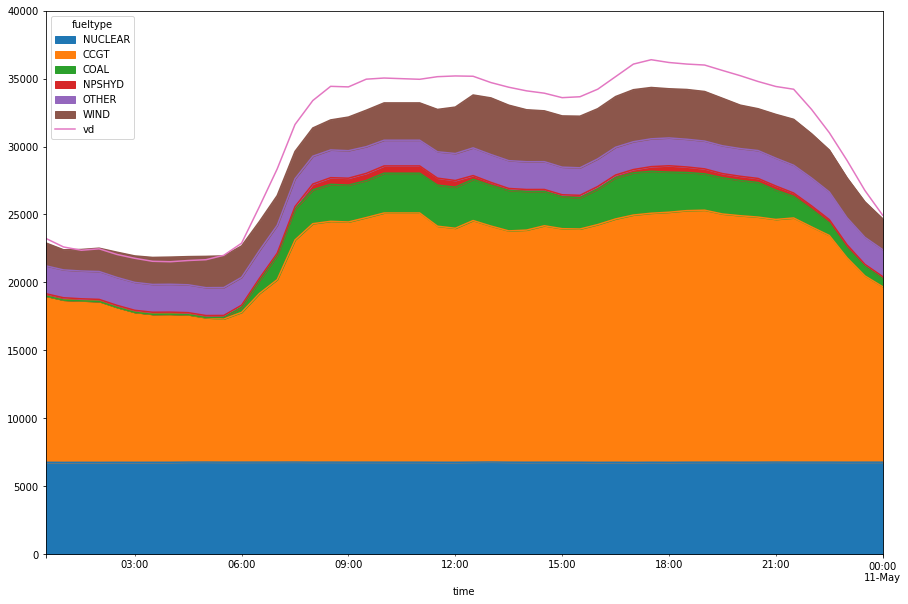

In [87]:
ax = sql_pivot[['NUCLEAR', 'CCGT', 'COAL', 'NPSHYD', 'OTHER', 'WIND']].plot.area(figsize=(15,10))
ax.set_ylim(0,40000)
demand_pivot.plot(ax=ax)

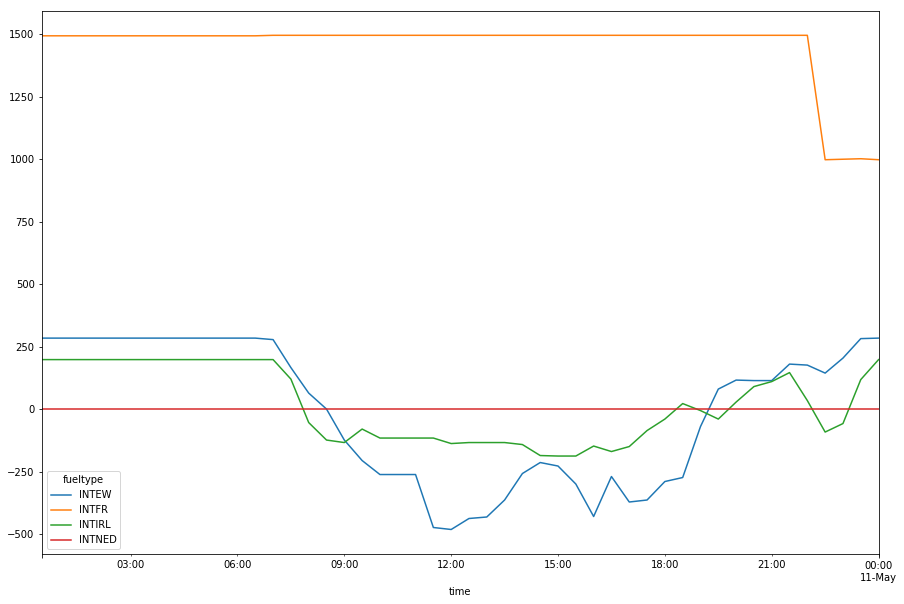

In [74]:
inter_df = sql_pivot[['INTEW', 'INTFR', 'INTIRL', 'INTNED']]
inter_df.plot(figsize=(15,10))